## Import libraries

In [20]:
from __future__ import division

from sqlalchemy import create_engine, MetaData, Table
import json
import math
import re
import csv
from itertools import izip_longest
from collections import Counter

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.ma as ma

%matplotlib inline

In [21]:
db_url = "sqlite:///../data/encoding/participants-test-room1.db"
table_name = 'turkdemo'
data_column_name = 'datastring'

# boilerplace sqlalchemy setup
engine = create_engine(db_url)
metadata = MetaData()
metadata.bind = engine
table = Table(table_name, metadata, autoload=True)

# make a query and loop through
s = table.select()
rows = s.execute()

data = []
for row in rows:
    data.append(row[data_column_name])
    
# Now we have all participant datastrings in a list.
# Let's make it a bit easier to work with:

# parse each participant's datastring as json object
# and take the 'data' sub-object
data = [json.loads(part)['data'] for part in data if part is not None]

# insert uniqueid field into trialdata in case it wasn't added
# in experiment:
for part in data:
    for record in part:
#         print(record)
        if type(record['trialdata']) is list:

            record['trialdata'] = {record['trialdata'][0]:record['trialdata'][1]}
        record['trialdata']['uniqueid'] = record['uniqueid']
        
# flatten nested list so we just have a list of the trialdata recorded
# each time psiturk.recordTrialData(trialdata) was called.
def isNotNumber(s):
    try:
        float(s)
        return False
    except ValueError:
        return True

data = [record['trialdata'] for part in data for record in part]

# filter out fields that we dont want using isNotNumber function
filtered_data = [{k:v for (k,v) in part.items() if isNotNumber(k)} for part in data]
    
# Put all subjects' trial data into a dataframe object from the
# 'pandas' python library: one option among many for analysis
data_frame = pd.DataFrame(filtered_data)

data_frame

,internal_node_id,key_press,listNumber,list_words,recalled_words,responses,rt,state,stimulus,time_elapsed,trialNumber,trial_index,trial_type,uniqueid,weights
0,0.0-0.0,NaN,NaN,NaN,NaN,"{""Q0"":""FRFR-092116_0"",""Q1"":""Andy""}",29856.0,NaN,NaN,29864.0,NaN,0.0,survey-text,debug82SI3M:debugJ7ZQB7,NaN
1,0.0-0.0,NaN,NaN,NaN,NaN,"{""Q0"":"""",""Q1"":""""}",1080.0,NaN,NaN,1089.0,NaN,0.0,survey-text,debug82SI3M:debugJ7ZQB7,NaN
2,0.0-0.0,NaN,NaN,NaN,NaN,"{""Q0"":""FRFR-092116_0"",""Q1"":""ANDY""}",24464.0,NaN,NaN,24472.0,NaN,0.0,survey-text,debug82SI3M:debugJ7ZQB7,NaN
3,0.0-0.0,32.0,NaN,NaN,NaN,NaN,5319.0,NaN,NaN,5320.0,NaN,0.0,text,debug82SI3M:debugJ7ZQB7,NaN
4,0.0-1.0,32.0,NaN,NaN,NaN,NaN,5577.0,NaN,NaN,11901.0,NaN,1.0,text,debug82SI3M:debugJ7ZQB7,NaN
5,0.0-2.0,32.0,NaN,NaN,NaN,NaN,1606.0,NaN,NaN,14511.0,NaN,2.0,text,debug82SI3M:debugJ7ZQB7,NaN
6,0.0-3.0,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,"<p style= 'color:rgb(214,229,18); font-size:5v...",17519.0,NaN,3.0,single-stim,debug82SI3M:debugJ7ZQB7,NaN
7,0.0-4.0,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,"<p style= 'color:rgb(131,169,151); font-size:5...",21524.0,NaN,4.0,single-stim,debug82SI3M:debugJ7ZQB7,NaN
8,0.0-5.0,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,"<p style= 'color:rgb(53,61,86); font-size:5vw;...",25531.0,NaN,5.0,single-stim,debug82SI3M:debugJ7ZQB7,NaN
9,0.0-6.0,32.0,NaN,NaN,NaN,NaN,10998.0,NaN,NaN,38530.0,NaN,6.0,text,debug82SI3M:debugJ7ZQB7,NaN


In [22]:
db_url = "sqlite:///../data/encoding/participants-test-room1.db"
table_name = 'turkdemo'
data_column_name = 'codeversion'

# boilerplace sqlalchemy setup
engine = create_engine(db_url)
metadata = MetaData()
metadata.bind = engine
table = Table(table_name, metadata, autoload=True)

# make a query and loop through
s = table.select()
rows = s.execute()

versions = []
version_dict = {}
for row in rows:
    version_dict[row[0]]=row[data_column_name]

    
version_col = []
for idx,sub in enumerate(data_frame['uniqueid'].unique()):
    for i in range(sum(data_frame['uniqueid']==sub)):
        version_col.append(version_dict[sub])
data_frame['exp_version']=version_col

# data_frame

In [23]:
# read in stimulus library
wordpool = pd.read_csv('../stimuli/cut_wordpool.csv')

In [24]:
# this function takes the data frame and returns subject specific data based on the subid variable
def filterData(data_frame,subid):
    filtered_stim_data = data_frame[data_frame['stimulus'].notnull() & data_frame['listNumber'].notnull()]
    filtered_stim_data = filtered_stim_data[filtered_stim_data['trial_type']=='single-stim']
    filtered_stim_data =  filtered_stim_data[filtered_stim_data['uniqueid']==subid]
    return filtered_stim_data

# this function parses the data creating an array of dictionaries, where each dictionary represents a trial (word presented) along with the stimulus attributes
def createStimDict(data):
    stimDict = []
    for index, row in data.iterrows():
        stimDict.append({
                'text': str(re.findall('>(.+)<',row['stimulus'])[0]),
                'color' : { 'r' : int(re.findall('rgb\((.+)\)',row['stimulus'])[0].split(',')[0]),
                           'g' : int(re.findall('rgb\((.+)\)',row['stimulus'])[0].split(',')[1]),
                           'b' : int(re.findall('rgb\((.+)\)',row['stimulus'])[0].split(',')[2])
                           },
                'location' : {
                    'top': float(re.findall('top:(.+)\%;', row['stimulus'])[0]),
                    'left' : float(re.findall('left:(.+)\%', row['stimulus'])[0])
                    },
                'category' : wordpool['CATEGORY'].iloc[list(wordpool['WORD'].values).index(str(re.findall('>(.+)<',row['stimulus'])[0]))],
                'size' : wordpool['SIZE'].iloc[list(wordpool['WORD'].values).index(str(re.findall('>(.+)<',row['stimulus'])[0]))],
                'wordLength' : len(str(re.findall('>(.+)<',row['stimulus'])[0])),
                'firstLetter' : str(re.findall('>(.+)<',row['stimulus'])[0])[0],
                'listnum' : row['listNumber']
            })
    return stimDict

# this function loads in the recall data into an array of arrays, where each array represents a list of words
def loadRecallData(subid):
    recalledWords = []
    for i in range(0,16):
        try:
            f = open('../data/recall/room1/' + subid + '/' + subid + '-' + str(i) + '.wav.txt', 'rb')
            spamreader = csv.reader(f, delimiter=' ', quotechar='|')
        except (IOError, OSError) as e:
            print(e)
        for row in spamreader:
            recalledWords.append(row[0].split(','))
    return recalledWords

# this function computes accuracy for a series of lists
def computeListAcc(stimDict,recalledWords):
    accVec = []
    for i in range(0,16):
        stim = [stim['text'] for stim in stimDict if stim['listnum']==i]
        recalled= recalledWords[i]
        
        acc = 0
        tmpstim = stim[:]
        for word in recalled:
            if word in tmpstim:
                tmpstim.remove(word)
                acc+=1
        accVec.append(acc/len(stim))
    return accVec

In [30]:
# subjects who have completed the exp
subids = list(data_frame[data_frame['listNumber']==15]['uniqueid'].unique())
#print(len(subids))
#print(subids)

# print(data_frame)

subids.remove('debugAD2211:debugB3TKJQ') # this was Andy testing all the way through
subids.remove('debug7XDZDR:debugO8OCCV') # another test
subids.remove('debugTX7U35:debugZFTPLT') # another test - allison
subids.remove('debugCWO54U:debugQ59MF8')

pres_data = []
pres = []
rec = []


pres_exp1 = []
rec_exp1 = []
pres_exp2 = []
rec_exp2 = []
pres_exp3 = []
rec_exp3 = []
pres_exp4 = []
rec_exp4 = []
pres_exp5 = []
rec_exp5 = []

pres_all = []
rec_all = []

uniqueID_1 = []

# for each subject that completed the experiment
for idx,sub in enumerate(subids):
    
    print('Running analysis for subject: ', sub)    
        
    # get the subjects data
    filteredStimData = filterData(data_frame,sub)
    
    # parse the subjects data
    stimDict = createStimDict(filteredStimData)
    sub_data = pd.DataFrame(stimDict)
    sub_data['subject']=idx
    sub_data['experiment']=filteredStimData['exp_version'].values[0]
    sub_data = sub_data[['experiment','subject','listnum','text','category','color','location','firstLetter','size','wordLength']]
    
    pres_data.append(sub_data)
    pres.append([list(sub_data[sub_data['listnum']==lst]['text'].values) for lst in sub_data['listnum'].unique()])
    
    # load in the recall data
    recalledWords = loadRecallData(sub)
    rec.append(recalledWords)
    
    if filteredStimData['exp_version'].values[0]=='0.0':
        pres_exp1.append([list(sub_data[sub_data['listnum']==lst]['text'].values) for lst in sub_data['listnum'].unique()])
        rec_exp1.append(recalledWords)
        uniqueID_1.append(filteredStimData['uniqueid'].values[0])
        
    if filteredStimData['exp_version'].values[0]=='1.0':
        pres_exp1.append([list(sub_data[sub_data['listnum']==lst]['text'].values) for lst in sub_data['listnum'].unique()])
        rec_exp1.append(recalledWords)
        uniqueID_1.append(filteredStimData['uniqueid'].values[0])
        
    if filteredStimData['exp_version'].values[0]=='1.1':
        pres_exp1.append([list(sub_data[sub_data['listnum']==lst]['text'].values) for lst in sub_data['listnum'].unique()])
        rec_exp1.append(recalledWords)
        uniqueID_1.append(filteredStimData['uniqueid'].values[0])
        
    if filteredStimData['exp_version'].values[0]=='2.1':
        pres_exp2.append([list(sub_data[sub_data['listnum']==lst]['text'].values) for lst in sub_data['listnum'].unique()])
        rec_exp2.append(recalledWords)
        
    if filteredStimData['exp_version'].values[0]=='3.2':
        pres_exp3.append([list(sub_data[sub_data['listnum']==lst]['text'].values) for lst in sub_data['listnum'].unique()])
        rec_exp3.append(recalledWords)
        
    if filteredStimData['exp_version'].values[0]=='4.1':
        pres_exp4.append([list(sub_data[sub_data['listnum']==lst]['text'].values) for lst in sub_data['listnum'].unique()])
        rec_exp4.append(recalledWords)
        
    if filteredStimData['exp_version'].values[0]=='5.1':
        pres_exp5.append([list(sub_data[sub_data['listnum']==lst]['text'].values) for lst in sub_data['listnum'].unique()])
        rec_exp5.append(recalledWords)
        
    experiments = ['0.0', '1.0', '1.1', '2.1', '3.2', '4.1', '5.1']     
        
    if filteredStimData['exp_version'].values[0] in experiments:
        pres_all.append([list(sub_data[sub_data['listnum']==lst]['text'].values) for lst in sub_data['listnum'].unique()])
        rec_all.append(recalledWords)
        
        
pres_data = pd.concat(pres_data)


# print(sub_data)

filteredStimData

('Running analysis for subject: ', u'debugIAU8V9:debugT1DECK')
('Running analysis for subject: ', u'debug02E4FI:debugF7UOXH')
('Running analysis for subject: ', u'debugGPNALW:debugXSJ1FD')
('Running analysis for subject: ', u'debugS4GATI:debug2LRP6X')
('Running analysis for subject: ', u'debugJAPX2W:debugFZOLSG')
('Running analysis for subject: ', u'debugA98B98:debug5H8QRL')
('Running analysis for subject: ', u'debugKDM8HT:debugH2I05W')
('Running analysis for subject: ', u'debugQS9870:debugKM1SRC')
('Running analysis for subject: ', u'debugHP65NS:debugLWS9KB')
('Running analysis for subject: ', u'debugVFPD79:debugIP75FV')
('Running analysis for subject: ', u'debugX84L2K:debugCDN40O')
('Running analysis for subject: ', u'debugSU1T93:debugKCB9VM')
('Running analysis for subject: ', u'debugE1CAO3:debugONZ2R5')
('Running analysis for subject: ', u'debug8DEMRS:debugC55CO6')
('Running analysis for subject: ', u'debugKUWU41:debug9FG9EP')
('Running analysis for subject: ', u'debugXUZA8U:debugM

,internal_node_id,key_press,listNumber,list_words,recalled_words,responses,rt,state,stimulus,time_elapsed,trialNumber,trial_index,trial_type,uniqueid,weights,exp_version
44164,0.0-11.0,-1.0,0.0,NaN,NaN,NaN,-1.0,NaN,"<p style= 'color:rgb(140,254,192); font-size:5...",81943.0,0.0,10.0,single-stim,debugYC9MZ3:debug5WOTDH,NaN,5.1
44165,0.0-12.0,-1.0,0.0,NaN,NaN,NaN,-1.0,NaN,"<p style= 'color:rgb(22,234,101); font-size:5v...",85950.0,1.0,11.0,single-stim,debugYC9MZ3:debug5WOTDH,NaN,5.1
44166,0.0-13.0,-1.0,0.0,NaN,NaN,NaN,-1.0,NaN,"<p style= 'color:rgb(139,43,111); font-size:5v...",89955.0,2.0,12.0,single-stim,debugYC9MZ3:debug5WOTDH,NaN,5.1
44167,0.0-14.0,-1.0,0.0,NaN,NaN,NaN,-1.0,NaN,"<p style= 'color:rgb(254,40,193); font-size:5v...",93961.0,3.0,13.0,single-stim,debugYC9MZ3:debug5WOTDH,NaN,5.1
44168,0.0-15.0,-1.0,0.0,NaN,NaN,NaN,-1.0,NaN,"<p style= 'color:rgb(198,80,210); font-size:5v...",97966.0,4.0,14.0,single-stim,debugYC9MZ3:debug5WOTDH,NaN,5.1
44169,0.0-16.0,-1.0,0.0,NaN,NaN,NaN,-1.0,NaN,"<p style= 'color:rgb(110,65,156); font-size:5v...",101971.0,5.0,15.0,single-stim,debugYC9MZ3:debug5WOTDH,NaN,5.1
44170,0.0-17.0,-1.0,0.0,NaN,NaN,NaN,-1.0,NaN,"<p style= 'color:rgb(226,211,186); font-size:5...",105977.0,6.0,16.0,single-stim,debugYC9MZ3:debug5WOTDH,NaN,5.1
44171,0.0-18.0,-1.0,0.0,NaN,NaN,NaN,-1.0,NaN,"<p style= 'color:rgb(23,214,17); font-size:5vw...",109982.0,7.0,17.0,single-stim,debugYC9MZ3:debug5WOTDH,NaN,5.1
44172,0.0-19.0,-1.0,0.0,NaN,NaN,NaN,-1.0,NaN,"<p style= 'color:rgb(36,75,19); font-size:5vw;...",113988.0,8.0,18.0,single-stim,debugYC9MZ3:debug5WOTDH,NaN,5.1
44173,0.0-20.0,-1.0,0.0,NaN,NaN,NaN,-1.0,NaN,"<p style= 'color:rgb(82,116,40); font-size:5vw...",117993.0,9.0,19.0,single-stim,debugYC9MZ3:debug5WOTDH,NaN,5.1


In [31]:
uniqueID_1

[u'debugIAU8V9:debugT1DECK',
 u'debug02E4FI:debugF7UOXH',
 u'debugGPNALW:debugXSJ1FD',
 u'debugS4GATI:debug2LRP6X',
 u'debugJAPX2W:debugFZOLSG',
 u'debugA98B98:debug5H8QRL',
 u'debugKDM8HT:debugH2I05W',
 u'debugQS9870:debugKM1SRC',
 u'debugHP65NS:debugLWS9KB',
 u'debugVFPD79:debugIP75FV',
 u'debugX84L2K:debugCDN40O',
 u'debugSU1T93:debugKCB9VM',
 u'debugE1CAO3:debugONZ2R5',
 u'debug8DEMRS:debugC55CO6',
 u'debugKUWU41:debug9FG9EP',
 u'debugXUZA8U:debugMR3K3X',
 u'debugN8TPWO:debugF1XWCH',
 u'debugZQ55YL:debug5WQHPC',
 u'debugWF2JFB:debugPNRZFQ',
 u'debugLXMXTP:debugJAXRZL',
 u'debugQRX0V3:debugFIWAG8']

In [32]:
len(pres_all) == len(rec_all)

True

In [33]:
import pyrec as pyr

pyro_all = pyr.Pyro(pres = pres_all, rec = rec_all)
pyro_1 = pyr.Pyro(pres = pres_exp1, rec = rec_exp1)
pyro_2 = pyr.Pyro(pres = pres_exp2, rec = rec_exp2)
pyro_3 = pyr.Pyro(pres = pres_exp3, rec = rec_exp3)
pyro_4 = pyr.Pyro(pres = pres_exp4, rec = rec_exp4)
pyro_5 = pyr.Pyro(pres = pres_exp5, rec = rec_exp5)


In [34]:
#filteredStimData

<h1>Number of Subjects Per Experiment</h1>

In [35]:
print("experiment 1: ")
print(len(pres_exp1))
print 

print("experiment 2: ")
print(len(pres_exp2))
print

print("experiment 3: ")
print(len(pres_exp3))
print

print("experiment 4: ")
print(len(pres_exp4))
print

print("experiment 5: ")
print(len(pres_exp5))
print

experiment 1: 
21

experiment 2: 
21

experiment 3: 
22

experiment 4: 
23

experiment 5: 
20



<h1> SPC Average </h1>

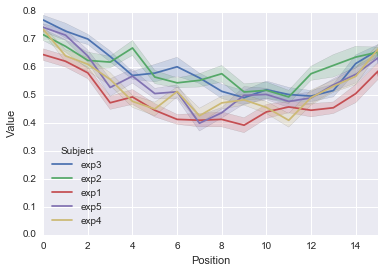

In [36]:
#AGGREGATE
spc_av = pyr.spc(pyro_all)#, listgroup = ['average']*16) 
pyr.plot(spc_av, plot_type = 'subject', subjgroup = ['exp1']*len(pres_exp1) + ['exp2']*len(pres_exp2) + ['exp3']*len(pres_exp3) + ['exp4']*len(pres_exp4) + ['exp5']*len(pres_exp5))

#INDIVIDUAL
# spc_single = pyr.spc(pyro_1)
# pyr.plot(spc_single)

<h1>PFR Average </h1>

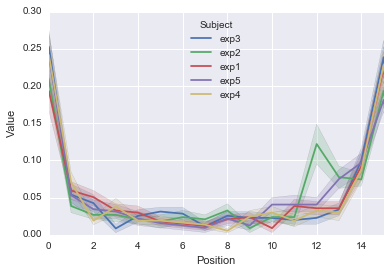

In [37]:
#AGGREGATE
pfr_av = pyr.pfr(pyro_all)#, listgroup = ['average']*16) 
pyr.plot(pfr_av, plot_type = 'subject', subjgroup = ['exp1']*len(pres_exp1) + ['exp2']*len(pres_exp2) + ['exp3']*len(pres_exp3) + ['exp4']*len(pres_exp4) + ['exp5']*len(pres_exp5))

#INDIVIDUAL
# pfr_single = pyr.pfr(pyro_1)
# pyr.plot(pfr_single)

<h1> PLR Average</h1>

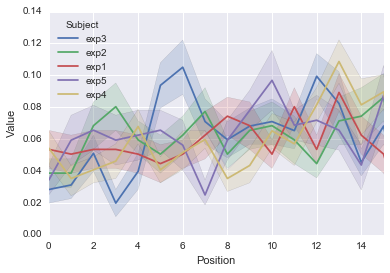

In [38]:
#AGGREGATE
plr_av = pyr.plr(pyro_all)#, listgroup = ['average']*16) 
pyr.plot(plr_av, plot_type = 'subject', subjgroup = ['exp1']*len(pres_exp1) + ['exp2']*len(pres_exp2) + ['exp3']*len(pres_exp3) + ['exp4']*len(pres_exp4) + ['exp5']*len(pres_exp5))
#INDIVIDUAL
# plr_single = pyr.plr(pyro_single)
# pyr.plot(plr_single)

<h1>Lag CRP, Average</h1>

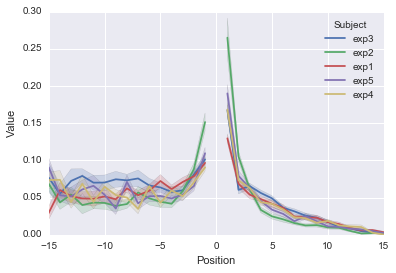

In [39]:
#AGGREGATE
lagcrp_av = pyr.lagcrp(pyro_all)#, listgroup = ['average']*16) 
pyr.plot(lagcrp_av, plot_type = 'subject', subjgroup = ['exp1']*len(pres_exp1) + ['exp2']*len(pres_exp2) + ['exp3']*len(pres_exp3) + ['exp4']*len(pres_exp4) + ['exp5']*len(pres_exp5))

#INDIVIDUAL
# lagcrp_single = pyr.lagcrp(pyro_single)
# pyr.plot(lagcrp_single)

<h1>Serial Position Curve, Early/Late Lists</h1>

Experiment 1


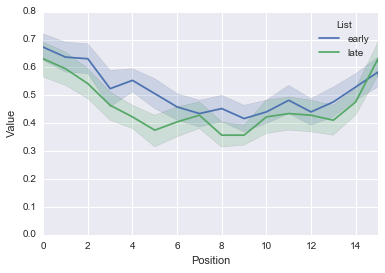

Experiment 2


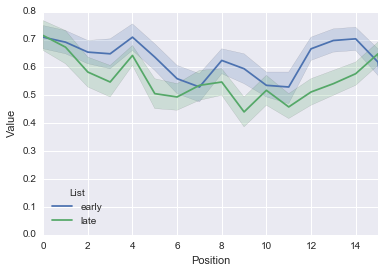

Experiment 3


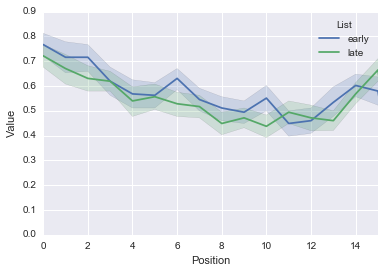

Experiment 4


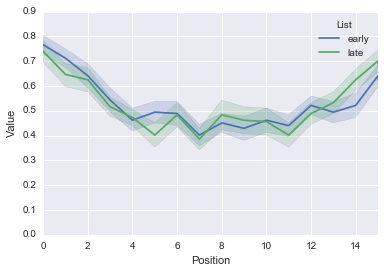

Experiment 5


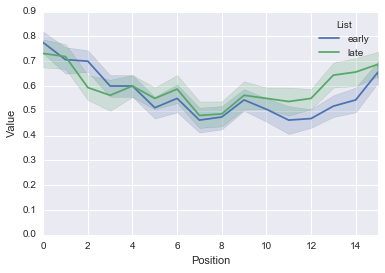

In [43]:
# # spc2_av = pyr.spc(pyro)
# # pyr.plot(spc2_av, plot_type = 'subject', subjgroup = ['exp1']*len(pres_exp1) + ['exp2']*len(pres_exp2) + ['exp3']*len(pres_exp3) + ['exp4']*len(pres_exp4) + ['exp5']*len(pres_exp5))
# #AGGREGATE
# spc_av = pyr.lagcrp(pyro_all)#, listgroup = ['average']*16) 
# pyr.plot(lagcrp_av, plot_type = 'subject', subjgroup = ['exp1']*len(pres_exp1) + ['exp2']*len(pres_exp2) + ['exp3']*len(pres_exp3) + ['exp4']*len(pres_exp4) + ['exp5']*len(pres_exp5))

# # #INDIVIDUAL
# # # spc_single = pyr.spc(pyro_single)
# # pyr.plot(spc_single)

fig = plt.figure()

print('Experiment 1')
spc2 = pyr.spc(pyro_1, listgroup=['early']*8 + ['late']*8)
fig_1 = pyr.plot(spc2)
fig.add_subplot(321)

print('Experiment 2')
spc3 = pyr.spc(pyro_2, listgroup=['early']*8 + ['late']*8)
fig_2 = pyr.plot(spc3)
fig.add_subplot(322)

print('Experiment 3')
spc4 = pyr.spc(pyro_3, listgroup=['early']*8 + ['late']*8)
fig_3 = pyr.plot(spc4)
fig.add_subplot(323)

print('Experiment 4')
spc5 = pyr.spc(pyro_4, listgroup=['early']*8 + ['late']*8)
fig_4 = pyr.plot(spc5)
fig.add_subplot(324)

print('Experiment 5')
spc6 = pyr.spc(pyro_5, listgroup=['early']*8 + ['late']*8)
fig_5 = pyr.plot(spc6)


<h1>PFR, Early/Late Lists</h1>

Experiment 1


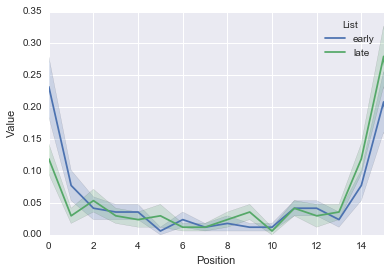

Experiment 2


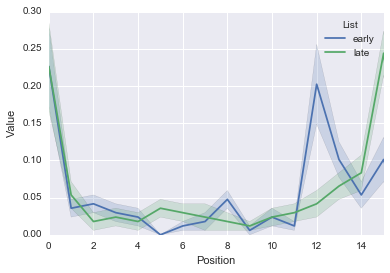

Experiment 3


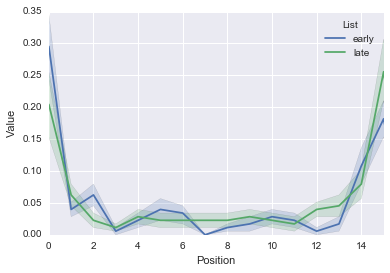

Experiment 4


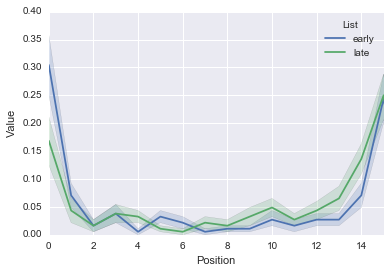

Experiment 5


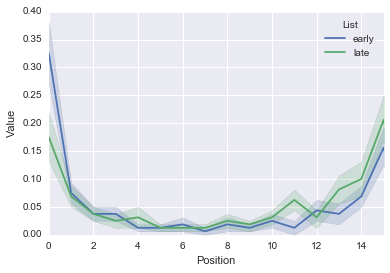

In [42]:
fig = plt.figure()

print('Experiment 1')
pfr2 = pyr.pfr(pyro_1, listgroup=['early']*8 + ['late']*8)
fig_1 = pyr.plot(pfr2)
fig.add_subplot(321)

print('Experiment 2')
pfr3 = pyr.pfr(pyro_2, listgroup=['early']*8 + ['late']*8)
fig_2 = pyr.plot(pfr3)
fig.add_subplot(322)

print('Experiment 3')
pfr4 = pyr.pfr(pyro_3, listgroup=['early']*8 + ['late']*8)
fig_3 = pyr.plot(pfr4)
fig.add_subplot(323)

print('Experiment 4')
pfr5 = pyr.pfr(pyro_4, listgroup=['early']*8 + ['late']*8)
fig_4 = pyr.plot(pfr5)
fig.add_subplot(324)

print('Experiment 5')
pfr6 = pyr.pfr(pyro_5, listgroup=['early']*8 + ['late']*8)
fig_5 = pyr.plot(pfr6)


<h1>PLR, Early/Late Lists

Experiment 1


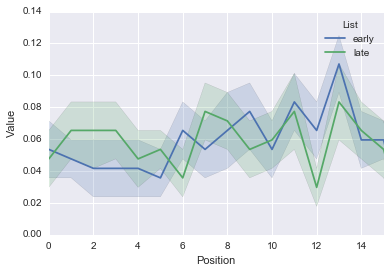

Experiment 2


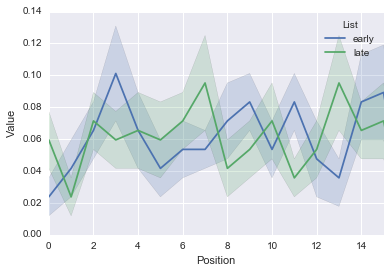

Experiment 3


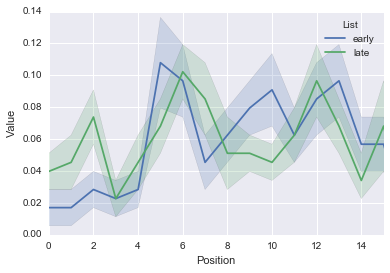

Experiment 4


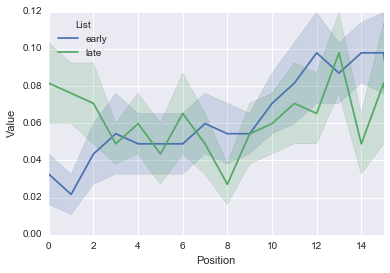

Experiment 5


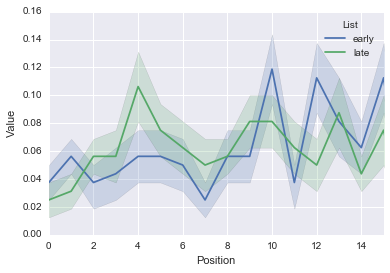

In [44]:
fig = plt.figure()

print('Experiment 1')
plr2 = pyr.plr(pyro_1, listgroup=['early']*8 + ['late']*8)
fig_1 = pyr.plot(plr2)
fig.add_subplot(321)

print('Experiment 2')
plr3 = pyr.plr(pyro_2, listgroup=['early']*8 + ['late']*8)
fig_2 = pyr.plot(plr3)
fig.add_subplot(322)

print('Experiment 3')
plr4 = pyr.plr(pyro_3, listgroup=['early']*8 + ['late']*8)
fig_3 = pyr.plot(plr4)
fig.add_subplot(323)

print('Experiment 4')
plr5 = pyr.plr(pyro_4, listgroup=['early']*8 + ['late']*8)
fig_4 = pyr.plot(plr5)
fig.add_subplot(324)

print('Experiment 5')
plr6 = pyr.plr(pyro_5, listgroup=['early']*8 + ['late']*8)
fig_5 = pyr.plot(plr6)

<h1>Lag CRP, Early/Late Lists

Experiment 1


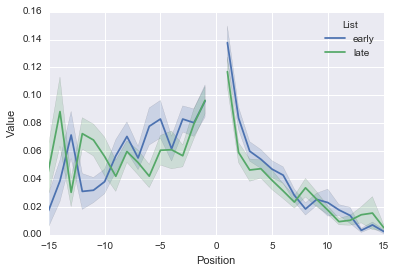

Experiment 2


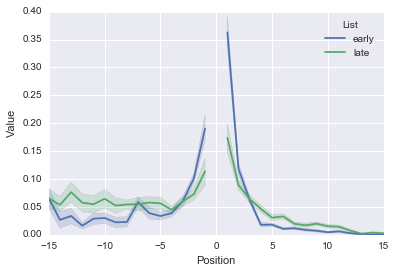

Experiment 3


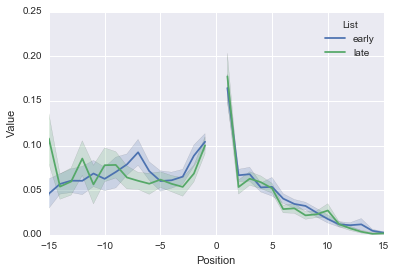

Experiment 4


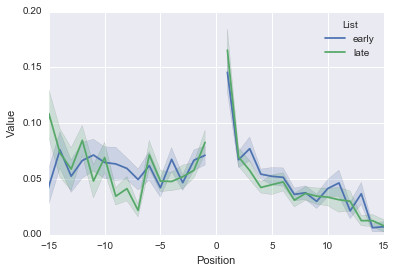

Experiment 5


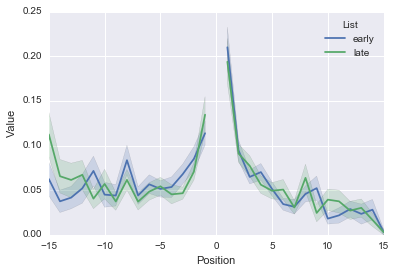

In [45]:
fig = plt.figure()

print('Experiment 1')
lagcrp2 = pyr.lagcrp(pyro_1, listgroup=['early']*8 + ['late']*8)
fig_1 = pyr.plot(lagcrp2)
fig.add_subplot(321)

print('Experiment 2')
lagcrp3 = pyr.lagcrp(pyro_2, listgroup=['early']*8 + ['late']*8)
fig_2 = pyr.plot(lagcrp3)
fig.add_subplot(322)

print('Experiment 3')
lagcrp4 = pyr.lagcrp(pyro_3, listgroup=['early']*8 + ['late']*8)
fig_3 = pyr.plot(lagcrp4)
fig.add_subplot(323)

print('Experiment 4')
lagcrp5 = pyr.lagcrp(pyro_4, listgroup=['early']*8 + ['late']*8)
fig_4 = pyr.plot(lagcrp5)
fig.add_subplot(324)

print('Experiment 5')
lagcrp6 = pyr.lagcrp(pyro_5, listgroup=['early']*8 + ['late']*8)
fig_5 = pyr.plot(lagcrp6)

<h1>SPC, by Subject

In [ ]:
# spc = pyr.spc(pyro, listgroup=['average']*16)
# pyr.plot(spc, plot_type='grid')#, subjgroup = ['exp1']*21 + ['exp2']*21 + ['exp3']*22 + ['exp4']*23 + ['exp5']*15 )


<h1>PFR, by Subject

In [ ]:
# pfr = pyr.pfr(pyro, listgroup=['average']*16)
# pyr.plot(pfr, plot_type='subject')

<h1>PLR, by Subject</h1>

In [ ]:
# plr = pyr.plr(pyro, listgroup=['average']*16)
# pyr.plot(plr, plot_type='subject')

<h1>Lag CRP, by Subject

In [ ]:
# lagcrp = pyr.lagcrp(pyro, listgroup=['average']*16)
# ax = pyr.plot(lagcrp, plot_type='subject')

<h1>Transcription Comparison

In [17]:
##IMPORTS#######
import os 
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
################

ALL_SUBS = []
uniqueID_man = []

for subject in os.listdir('/Users/Student/Documents/github/FRFR-analyses/etc/audio_transcriptions_exp1/')[1:]:
    # for each subject folder (in list of strings)
    
    uniqueID_man.append(subject)

    folder='/Users/Student/Documents/github/FRFR-analyses/etc/audio_transcriptions_exp1/'+subject
    os.chdir(folder)
    # change into that subject dir

    SUB_LISTS = []

    for x in range(0,16):
    
        MAN = []

        manname= '*'+str(x)+'.txt'
        MAN_file = open(glob.glob(manname)[0], "r")
        MAN_contents = MAN_file.read().split()
        for line in MAN_contents:
            MAN.append(line.upper())
            MAN_file.close()
        
        SUB_LISTS.append(MAN)
    
    ALL_SUBS.append(SUB_LISTS)
    
    os.chdir('../')


# pyro_1a = pyr.Pyro(pres = pres_exp1, rec = rec_exp1)
pyro_1m = pyr.Pyro(pres = pres_exp1, rec = ALL_SUBS)

uniqueID_man

['debug02E4FIdebugF7UOXH ',
 'debug8DEMRS:debugC55CO6 ',
 'debugA98B98:debug5H8QRL ',
 'debugE1CAO3:debugONZ2R5 ',
 'debugHP65NS:debugLWS9KB ',
 'debugIAU8V9:debugT1DECK ',
 'debugJAPX2W:debugFZOLSG ',
 'debugKDM8HT:debugH2I05W ',
 'debugKUWU41:debug9FG9EP ',
 'debugLXMXTP:debugJAXRZL',
 'debugN8TPWO:debugF1XWCH',
 'debugQRX0V3:debugFIWAG8',
 'debugQS9870:debugKM1SRC ',
 'debugS4GATI:debug2LRP6X ',
 'debugSU1T93:debugKCB9VM ',
 'debugVFPD79:debugIP75FV ',
 'debugWF2JFB:debugPNRZFQ',
 'debugX84L2K:debugCDN40O ',
 'debugXUZA8U:debugMR3K3X',
 'debugZQ55YL:debug5WQHPC']

In [18]:
print(uniqueID_1)
print(uniqueID_man)

# for each in uniqueID_man:
#      print([i for i,x in enumerate(uniqueID_1) if x == each[0:23]])
    
switcher = [1, 13, 5, 12, 8, 0, 4, 6, 14, 19, 16, 20, 7, 3, 11, 9, 18, 10, 15, 17]
                     

    

#second uniqueID_1[13]
#third uniqueID_1[5]

[u'debugIAU8V9:debugT1DECK', u'debug02E4FI:debugF7UOXH', u'debugGPNALW:debugXSJ1FD', u'debugS4GATI:debug2LRP6X', u'debugJAPX2W:debugFZOLSG', u'debugA98B98:debug5H8QRL', u'debugKDM8HT:debugH2I05W', u'debugQS9870:debugKM1SRC', u'debugHP65NS:debugLWS9KB', u'debugVFPD79:debugIP75FV', u'debugX84L2K:debugCDN40O', u'debugSU1T93:debugKCB9VM', u'debugE1CAO3:debugONZ2R5', u'debug8DEMRS:debugC55CO6', u'debugKUWU41:debug9FG9EP', u'debugXUZA8U:debugMR3K3X', u'debugN8TPWO:debugF1XWCH', u'debugZQ55YL:debug5WQHPC', u'debugWF2JFB:debugPNRZFQ', u'debugLXMXTP:debugJAXRZL', u'debugQRX0V3:debugFIWAG8']
['debug02E4FIdebugF7UOXH ', 'debug8DEMRS:debugC55CO6 ', 'debugA98B98:debug5H8QRL ', 'debugE1CAO3:debugONZ2R5 ', 'debugHP65NS:debugLWS9KB ', 'debugIAU8V9:debugT1DECK ', 'debugJAPX2W:debugFZOLSG ', 'debugKDM8HT:debugH2I05W ', 'debugKUWU41:debug9FG9EP ', 'debugLXMXTP:debugJAXRZL', 'debugN8TPWO:debugF1XWCH', 'debugQRX0V3:debugFIWAG8', 'debugQS9870:debugKM1SRC ', 'debugS4GATI:debug2LRP6X ', 'debugSU1T93:debugKCB9

In [19]:
track = 0
count = []
for sub in ALL_SUBS:
    x = len(list(set(rec_exp1[3][0]).intersection(sub[0])))
    #x is length of intersection of first list in auto and first list in manual for each manual subject
    count.append(x)
    track = track + 1
    print(track, x)

pos = [i for i, j in enumerate(count) if j == max(count)]
print(pos)

(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 6)
(10, 0)
(11, 0)
(12, 0)
(13, 0)
(14, 9)
(15, 0)
(16, 0)
(17, 6)
(18, 0)
(19, 0)
(20, 0)
[13]


In [20]:
for idx,x in enumerate(switcher):
    if x>1:
        switcher[idx] = x-1

In [21]:
print(switcher)

[1, 12, 4, 11, 7, 0, 3, 5, 13, 18, 15, 19, 6, 2, 10, 8, 17, 9, 14, 16]


In [22]:
ordered_rec = [0] * 20

for idx,each in enumerate(switcher):
    ordered_rec[each] = ALL_SUBS[idx]
    
#pyro_1m = pyr.Pyro(pres = ordered_pres, rec = ALL_SUBS)

In [27]:
print(ordered_rec[3][0])
print(rec_exp1[4][0])

['ALASKA', 'OHIO', 'PENNSYLVANIA', 'RUTABAGA', 'TERMITE', 'WASP', 'OKRA', 'CHRYSALIS', 'BEETLE', 'LLAMA']
['ALASKA', 'OHIO', 'PENNSYLVANIA', 'RUTABAGA', 'TERMITE', 'WASP', 'OKRA', 'CHRYSALIS', 'BEETLE', 'LLAMA']


In [35]:
new_pres = pres_exp1[0:2] + pres_exp1[3:]
print(len(new_pres)==len(ordered_rec))

True


In [36]:
pyro_1m = pyr.Pyro(pres = new_pres, rec = ordered_rec)

<h1>Compare Curves for Manual and Auto Transcriptions (Exp 1)</h1>

<h2> Serial Position Curve</h2>

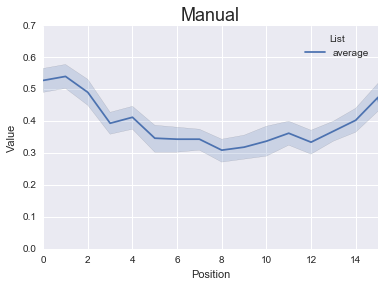

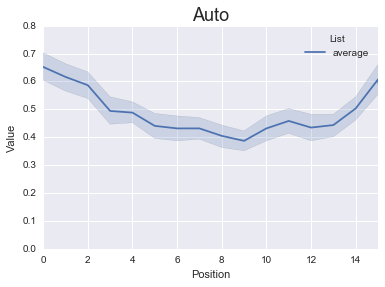

In [74]:
spc_single1 = pyr.spc(pyro_1m, listgroup = ['average']*16)
plt.title('Manual', fontsize=18)
plt.ylim(0,.7)
pyr.plot(spc_single1)

spc_single2 = pyr.spc(pyro_1, listgroup = ['average']*16)
plt.title('Auto', fontsize=18)
pyr.plot(spc_single2)


<h2> Probability of First Recall</h2>

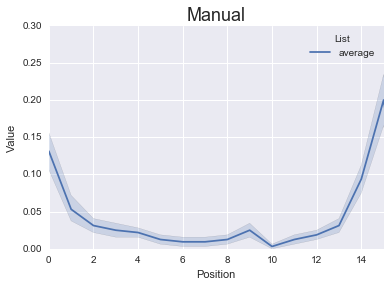

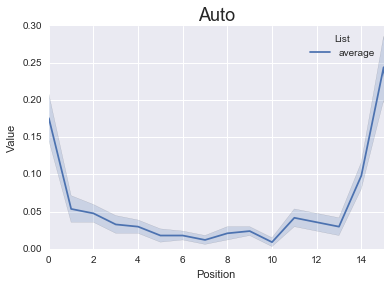

In [73]:
pfr_single = pyr.pfr(pyro_1m, listgroup = ['average']*16)
plt.title('Manual', fontsize=18)
plt.ylim(0,.3)
pyr.plot(pfr_single)

pfr_single = pyr.pfr(pyro_1, listgroup = ['average']*16)
plt.title('Auto', fontsize=18)
plt.ylim(0,.3)
pyr.plot(pfr_single)

<h2>Probability of Last Recall</h2>

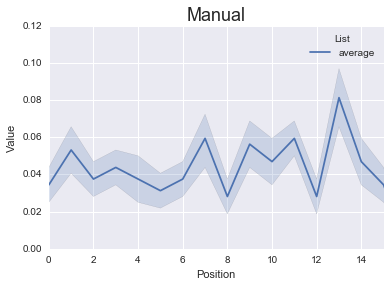

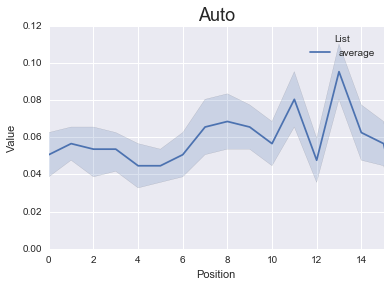

In [72]:
plr_single = pyr.plr(pyro_1m, listgroup = ['average']*16)
plt.title('Manual', fontsize=18)
plt.ylim(0,.12)
pyr.plot(plr_single)

plr_single = pyr.plr(pyro_1, listgroup = ['average']*16)
plt.title('Auto', fontsize=18)
plt.ylim(0,.12)
pyr.plot(plr_single)

<h2>Lag CRP</h2>

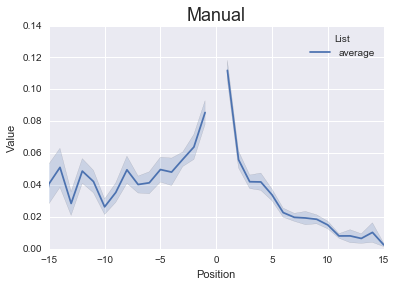

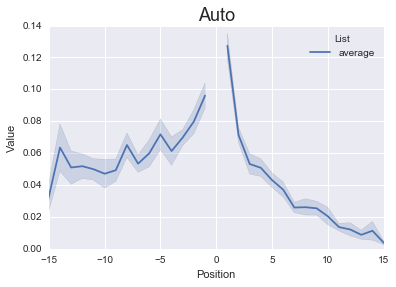

In [71]:
lagcrp_single = pyr.lagcrp(pyro_1m, listgroup = ['average']*16)
plt.title('Manual', fontsize=18)
plt.ylim(0,.14)
pyr.plot(lagcrp_single)

lagcrp_single = pyr.lagcrp(pyro_1, listgroup = ['average']*16)
plt.title('Auto', fontsize=18)
plt.ylim(0,.14)
pyr.plot(lagcrp_single)